# 2D transfer function
Plotting the data in one axis and the uncertainty in an orthogonal one, one could identify clusters. These clusters could be used to define colors for a volume rendering.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import utils

# $\mu$-$\sigma$ plane

In [2]:
kidney = np.loadtxt('../../Data/kidney.csv', delimiter=',', skiprows=1, usecols=(0), dtype=np.float32).reshape((512,512))

#enforce to be zero on the edges
kidney[:,:10] = 50
kidney[:,-10:] = 50
kidney[:10,:] = 50
kidney[-10:,:] = 50

kidney = kidney[::8,::8]
img_shape = kidney.shape[0]

print(kidney.shape)

(64, 64)


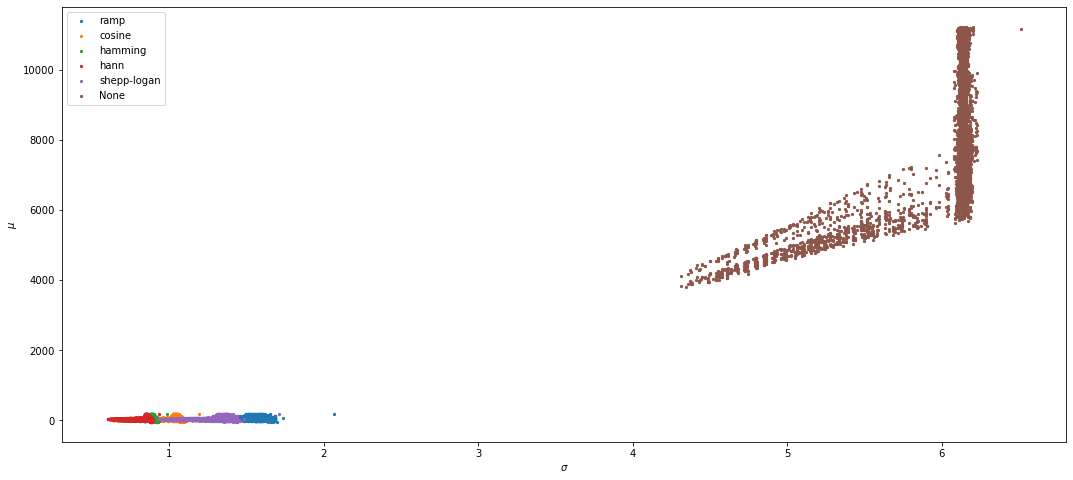

In [3]:
width = 10
percent = 5

algs = ['ramp', 'cosine', 'hamming', 'hann', 'shepp-logan', 'None']

plt.figure(figsize=(18,8))
x_max = 0

for idx,algo in enumerate(algs):
    mu = np.load('../../Data/iradon/mu_'+algo+'.npy')
    df_dx = np.load('../../Data/iradon/df_dx_'+algo+'.npy')
    var = np.ones((64,64)) * 1100
    Sigma_in = utils.build_covariance_y(var, function=utils.exponential, width=width)
    Sigma = df_dx @ Sigma_in @ np.transpose(df_dx)

    variance = np.sqrt(np.reshape(np.abs(np.diag(Sigma)), (64,64)))

    plt.scatter( variance.flatten(), mu.flatten(), s=5, label=algo )
    x_max = max(x_max, variance.max())
    
#plt.xlim(0, x_max)
plt.legend()
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$\mu$')
plt.show()

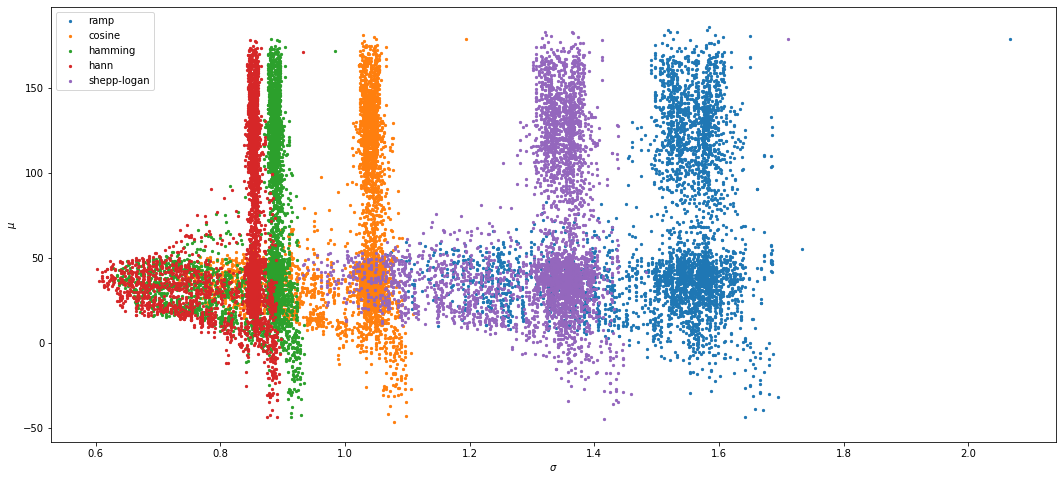

In [4]:
width = 10
percent = 5

algs = ['ramp', 'cosine', 'hamming', 'hann', 'shepp-logan']

plt.figure(figsize=(18,8))
x_max = 0

for idx,algo in enumerate(algs):
    mu = np.load('../../Data/iradon/mu_'+algo+'.npy')
    df_dx = np.load('../../Data/iradon/df_dx_'+algo+'.npy')
    var = np.ones((64,64)) * 1100
    Sigma_in = utils.build_covariance_y(var, function=utils.exponential, width=width)
    Sigma = df_dx @ Sigma_in @ np.transpose(df_dx)

    variance = np.sqrt(np.reshape(np.abs(np.diag(Sigma)), (64,64)))

    plt.scatter( variance.flatten(), mu.flatten(), s=5, label=algo )
    x_max = max(x_max, variance.max())
    
#plt.xlim(0, x_max)
plt.legend()
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$\mu$')
plt.show()

# BD-$\sigma_D$-plane

In [5]:
def hellinger(mu1, var1, mu2, var2):
    return 1 - np.sqrt(2 * np.sqrt(var1 * var2)) / (var1 + var2) * np.exp(
        - 0.25 * (mu1 - mu2)**2 / (var1 + var2)
    )
def bhattacharyya(mu1, var1, mu2, var2):
    return 0.25 * np.log(
        0.25 * (
            var1/var2 + var2/var1 + 2
        )
    ) + 0.25 * (
        (mu1 - mu2)**2 / ( var1 + var2 )
    )

In [6]:
width = 10
percent = 5

algs = ['ramp', 'cosine', 'hamming', 'hann', 'shepp-logan']

@widgets.interact(algo1=algs, algo2=algs)
def show_bd(algo1='ramp', algo2='cosine'):
    plt.figure(figsize=(18,8))
    
    mu1 = np.load('../../Data/iradon/mu_'+algo1+'.npy')
    df_dx = np.load('../../Data/iradon/df_dx_'+algo1+'.npy')
    var = np.ones((64,64)) * 60
    Sigma_in = utils.build_covariance_matrix(var, function=utils.exponential, width=width)
    Sigma = df_dx @ Sigma_in @ np.transpose(df_dx)

    variance1 = np.reshape(np.abs(np.diag(Sigma)), (64,64))
    
    mu2 = np.load('../../Data/iradon/mu_'+algo2+'.npy')
    df_dx = np.load('../../Data/iradon/df_dx_'+algo2+'.npy')
    var = np.ones((64,64)) * 60
    Sigma_in = utils.build_covariance_matrix(var, function=utils.exponential, width=width)
    Sigma = df_dx @ Sigma_in @ np.transpose(df_dx)

    variance2 = np.reshape(np.abs(np.diag(Sigma)), (64,64))
    
    BD = hellinger(mu1, variance1, mu2, variance2)
    
    var = bhattacharyya(mu1, variance1, mu2, variance2)

    plt.scatter( var.flatten(), BD.flatten(), s=5 )

    plt.xlabel(r'$BD$')
    plt.ylabel(r'$\sigma$')
    plt.show()

interactive(children=(Dropdown(description='algo1', options=('ramp', 'cosine', 'hamming', 'hann', 'shepp-logan…

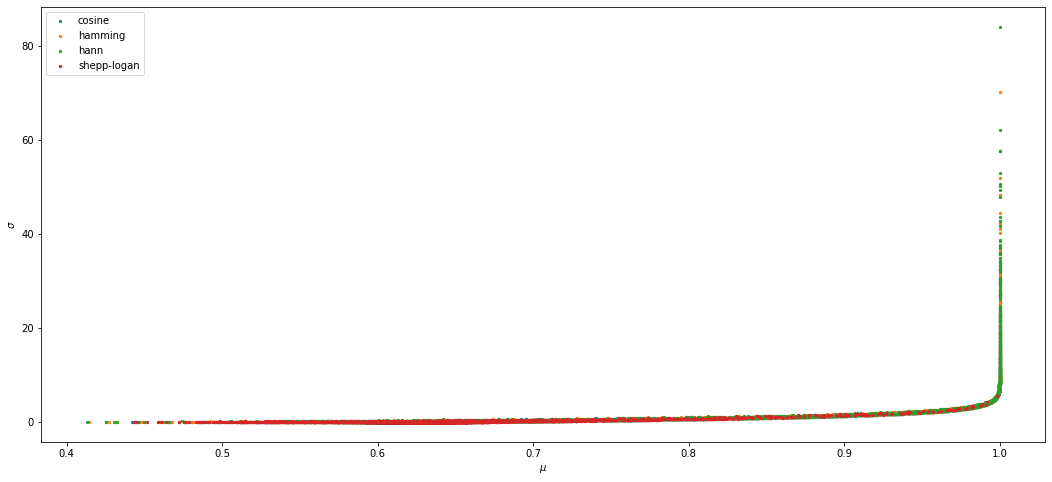

In [6]:
width = 10
percent = 5

algs = ['ramp', 'cosine', 'hamming', 'hann', 'shepp-logan']

mu1 = np.load('../../Data/iradon/mu_'+algs[0]+'.npy')
df_dx = np.load('../../Data/iradon/df_dx_'+algs[0]+'.npy')
var = np.ones((64,64)) * 60
Sigma_in = utils.build_covariance_matrix(var, function=utils.exponential, width=width)
Sigma = df_dx @ Sigma_in @ np.transpose(df_dx)

variance1 = np.sqrt(np.reshape(np.abs(np.diag(Sigma)), (64,64)))

plt.figure(figsize=(18,8))
x_max = 0

for idx,algo in enumerate(algs[1:]):
    mu2 = np.load('../../Data/iradon/mu_'+algo+'.npy')
    df_dx = np.load('../../Data/iradon/df_dx_'+algo+'.npy')
    var = np.ones((64,64)) * 60
    Sigma_in = utils.build_covariance_matrix(var, function=utils.exponential, width=width)
    Sigma = df_dx @ Sigma_in @ np.transpose(df_dx)

    variance2 = np.sqrt(np.reshape(np.abs(np.diag(Sigma)), (64,64)))
    
    he = hellinger(mu1, variance1, mu2, variance2)
    
    bha = bhattacharyya(mu1, variance1, mu2, variance2)

    plt.scatter( he.flatten(), bha.flatten(), s=5, label=algo )
    #x_max = max(x_max, variance.max())
    
#plt.xlim(0, x_max)
plt.legend()
plt.xlabel(r'$\mu$')
plt.ylabel(r'$\sigma$')
plt.show()